# Wrangle Review Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import json

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.lower()))

# Load Cleaned Business Data

In [4]:
restaurant_data = pd.read_csv('../clean_data/az_restaurant_business_clean.csv', index_col=0)
restaurant_bids = restaurant_data.business_id.values
print('{:d} Restaurant business_id values'.format(len(restaurant_bids)))

7066 Restaurant business_id values


In [6]:
restaurant_data.head(3)

,address,business_id,categories,city,is_open,name,postal_code,review_count,stars,is_fast_food
0,"777 E Thunderbird Rd, Ste 107",1WBkAuQg81kokZIPMpn9Zg,"['burgers', 'restaurants']",Phoenix,1,Charr An American Burger Bar,85022.0,232,3.0,0
1,10720 E Southern Ave,kKx8iCJkomVQBdWHnmmOiA,"['restaurants', 'pizza']",Mesa,1,Little Caesars Pizza,85209.0,4,2.5,0
2,"8140 N Hayden Rd, Ste H115",VdlPZg2NAu8t8GkdbPLecg,"['restaurants', 'gluten-free', 'indian', 'seaf...",Scottsdale,1,Tandoori Times Indian Bistro,85258.0,263,3.5,0


In [10]:
fast_food_indicator = restaurant_data[['business_id', 'is_fast_food']].copy()
fast_food_indicator.head(3)

,business_id,is_fast_food
0,1WBkAuQg81kokZIPMpn9Zg,0
1,kKx8iCJkomVQBdWHnmmOiA,0
2,VdlPZg2NAu8t8GkdbPLecg,0


## Load Review Data for All Arizona Restaurants
<p>use the list of restaurant_bids provided by the cleaned business data file</p>

<p><b>WARNING: All Restaurants TAKES ROUGHLY 25 MINUTES</b></p>

In [5]:
all_restaurant_reviews = []

source_data_file = '../source_data/review.json'

# read the file line by line and save only lines we need
with open(source_data_file, 'r') as review_file:
    for i, review_json in enumerate(review_file):
        review = json.loads(review_json)

        # append to restaurant reviews
        if review['business_id'] not in restaurant_bids:
            pass
        else:
            # append to all restaurants revie wlist
            all_restaurant_reviews.append(review)
        
        if i % 500000 == 0 and i != 0:
            time_marker('processed {:d} reviews so far...'.format(i))

print('Selected {:d} Arizona Restaurant Reviews from {:d} total reviews'.format(len(all_restaurant_reviews), i))
reviews_df = pd.DataFrame(all_restaurant_reviews)

[01:45:27.761683] processed 500000 reviews so far...
[01:47:37.980433] processed 1000000 reviews so far...
[01:49:58.979787] processed 1500000 reviews so far...
[01:52:05.243675] processed 2000000 reviews so far...
[01:54:14.052941] processed 2500000 reviews so far...
[01:56:27.700646] processed 3000000 reviews so far...
[01:58:35.375970] processed 3500000 reviews so far...
[02:00:53.596768] processed 4000000 reviews so far...
[02:03:08.555275] processed 4500000 reviews so far...
[02:05:21.131397] processed 5000000 reviews so far...
Selected 501250 Arizona Restaurant Reviews from 5261668 total reviews


# Review Star Distribution

In [12]:
reviews_df = reviews_df.merge(fast_food_indicator, on='business_id', how='left')

In [13]:
reviews_df.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,is_fast_food
0,JlNeaOymdVbE6_bubqjohg,0,2014-08-09,0,BF0ANB54sc_f-3_howQBCg,1,We always go to the chevo's in chandler which ...,3,ssuXFjkH4neiBgwv-oN4IA,0
1,0Rni7ocMC_Lg2UH0lDeKMQ,0,2014-08-09,0,DbLUpPT61ykLTakknCF9CQ,1,"This place is always so dirty and grimy, been ...",6,ssuXFjkH4neiBgwv-oN4IA,0
2,S-oLPRdhlyL5HAknBKTUcQ,0,2017-11-30,0,z_mVLygzPn8uHp63SSCErw,4,Holy portion sizes! You get a lot of bang for ...,0,MzEnYCyZlRYQRISNMXTWIg,0


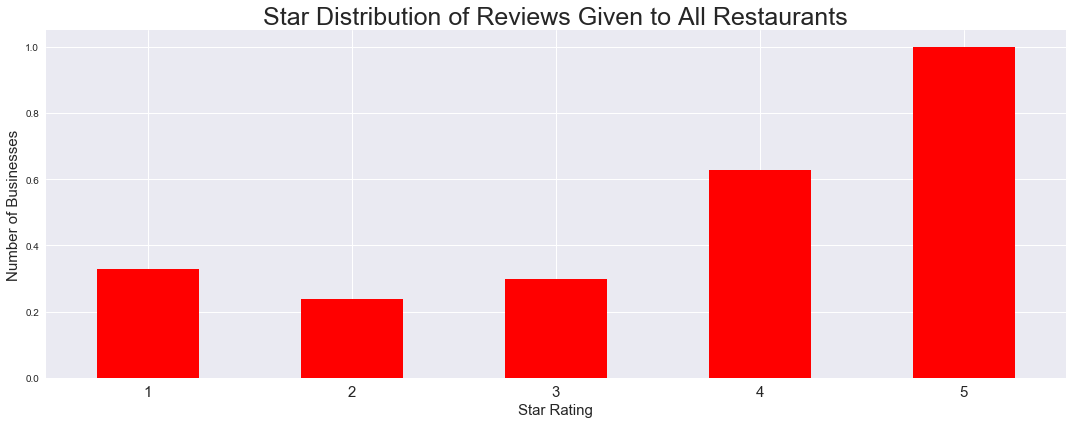

In [14]:
df = reviews_df.groupby('stars').count()['business_id'].copy()
df = df/df.max()

ax = df.plot(kind='bar', figsize=FIG_SIZE, color='r')
ax.set_title('Star Distribution of Reviews Given to All Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/restaurant_review_stars_distribution.png')
plt.show()
plt.close()

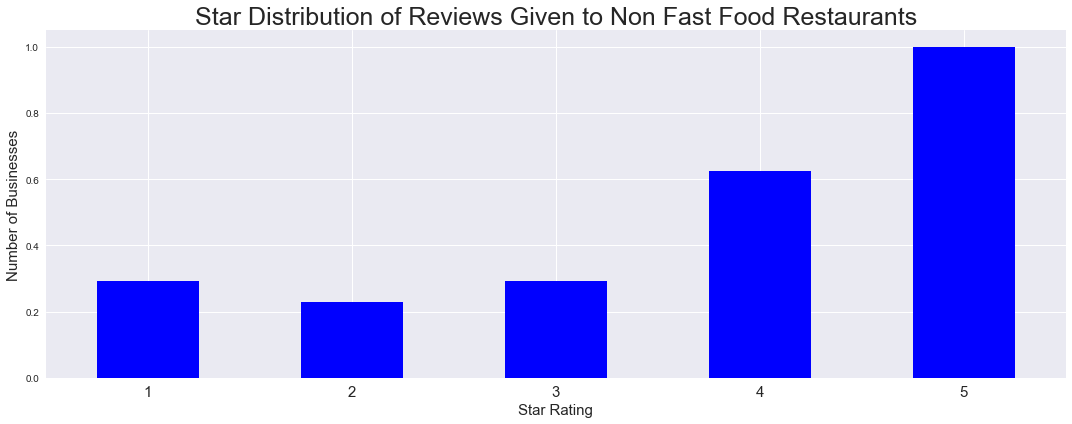

In [15]:

df = reviews_df[reviews_df.is_fast_food == 0].groupby('stars').count()['business_id'].copy()
df = df/df.max()
ax = df.plot(kind='bar', figsize=FIG_SIZE, color='b')

ax.set_title('Star Distribution of Reviews Given to Non Fast Food Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/non_fast_food_restaurant_review_stars_distribution.png')
plt.show()
plt.close()

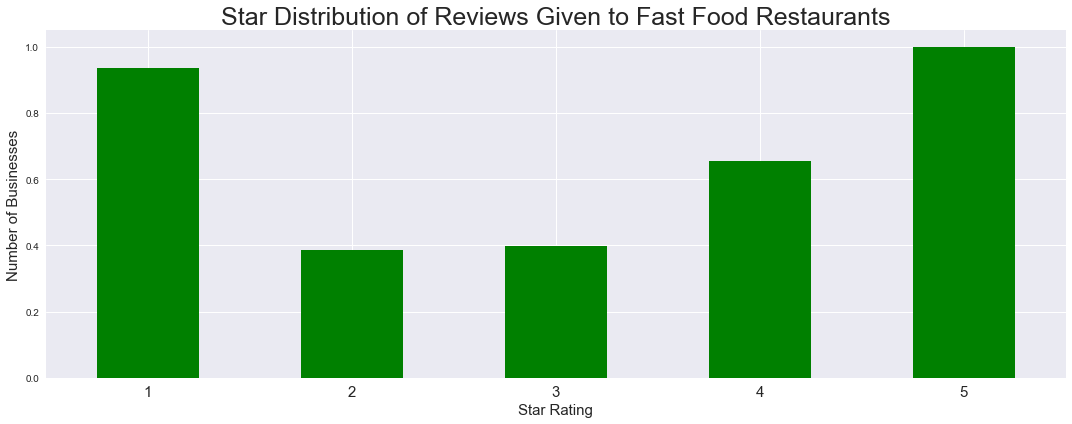

In [16]:
df = reviews_df[reviews_df.is_fast_food == 1].groupby('stars').count()['business_id'].copy()
df = df/df.max()
ax = df.plot(kind='bar', figsize=FIG_SIZE, color='g')

ax.set_title('Star Distribution of Reviews Given to Fast Food Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/fast_food_restaurant_review_stars_distribution.png')
plt.show()
plt.close()

# Sanitize Review Text for CSV

In [57]:
reviews_df['text'] = reviews_df.text.apply(lambda x: x.replace(',', '').lower())
reviews_df['review_len'] = reviews_df.text.str.len()

try:
    reviews_df.drop(['text_clean'], axis=1, inplace=True)
except:
    pass

In [58]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

reviews_df['business_id'] = reviews_df['business_id'].astype('str')
reviews_df['review_id'] = reviews_df['review_id'].astype('str')
reviews_df['text'] = reviews_df['text'].astype('str')
reviews_df['user_id'] = reviews_df['user_id'].astype('str')
reviews_df['text'] = reviews_df['text'].astype('str')

reviews_df['cool'] = reviews_df['cool'].astype('int')
reviews_df['funny'] = reviews_df['funny'].astype('int')
reviews_df['stars'] = reviews_df['stars'].astype('int')
reviews_df['useful'] = reviews_df['useful'].astype('int')
reviews_df['is_fast_food'] = reviews_df['is_fast_food'].astype('int')

In [59]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501250 entries, 0 to 501249
Data columns (total 11 columns):
business_id     501250 non-null object
cool            501250 non-null int64
date            501250 non-null datetime64[ns]
funny           501250 non-null int64
review_id       501250 non-null object
stars           501250 non-null int64
text            501250 non-null object
useful          501250 non-null int64
user_id         501250 non-null object
is_fast_food    501250 non-null int64
review_len      501250 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 65.9+ MB


# Pruning Short Reviews
<p>Yelp Reviews in this subset of Arizona Restaurants.  After investingating that the 5% Quantile year over year in any of our selected review subsets is rarely under 85 characters long, we will br conservative and prune all reviews less than 80 characters in length</p>

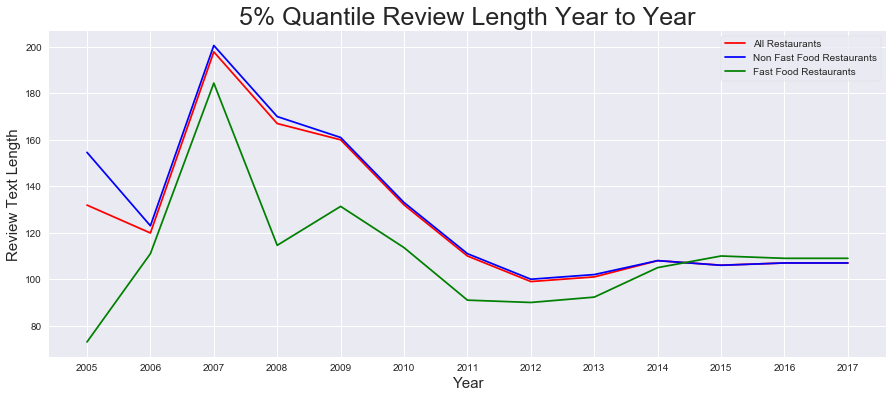

In [60]:
non_fast_food_reviews_df = reviews_df[reviews_df.is_fast_food == 0].copy()
fast_food_reviews_df = reviews_df[reviews_df.is_fast_food == 1].copy()

ax = reviews_df.groupby(reviews_df.date.dt.year).quantile(0.05)['review_len'].plot(figsize=FIG_SIZE, color='r')
non_fast_food_reviews_df.groupby(non_fast_food_reviews_df.date.dt.year).quantile(0.05)['review_len'].plot(ax=ax, color='b')
fast_food_reviews_df.groupby(fast_food_reviews_df.date.dt.year).quantile(0.05)['review_len'].plot(ax=ax, color='g')

ax.set_title('5% Quantile Review Length Year to Year', size=TITLE_FONT_SIZE)
ax.set_xlabel('Year', size=LABEL_FONT_SIZE)
ax.set_ylabel('Review Text Length', size=LABEL_FONT_SIZE)

ax.set_xticks(reviews_df.groupby(reviews_df.date.dt.year).quantile(0.05)['review_len'].index)

ax.legend(['All Restaurants', 'Non Fast Food Restaurants', 'Fast Food Restaurants'], loc=1, frameon=True)

plt.savefig('../charts/review_length_Q05_yearly.png')
plt.show()
plt.close()

In [61]:
min_review_len = 80

reviews_df_count = reviews_df.shape[0]
reviews_df = reviews_df[reviews_df.review_len >= min_review_len].copy()
reviews_df.reset_index(inplace=True, drop=True)

In [62]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495894 entries, 0 to 495893
Data columns (total 11 columns):
business_id     495894 non-null object
cool            495894 non-null int64
date            495894 non-null datetime64[ns]
funny           495894 non-null int64
review_id       495894 non-null object
stars           495894 non-null int64
text            495894 non-null object
useful          495894 non-null int64
user_id         495894 non-null object
is_fast_food    495894 non-null int64
review_len      495894 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 41.6+ MB


In [63]:
print('Reduced {:d} reviews to a subset of {:d} reviews {:2.4f} [reviews_df]'.format(reviews_df_count, 
                                                                                        reviews_df.shape[0], 
                                                                                        (100.*reviews_df.shape[0]/reviews_df_count)))

Reduced 501250 reviews to a subset of 495894 reviews 98.9315 [reviews_df]


In [64]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495894 entries, 0 to 495893
Data columns (total 11 columns):
business_id     495894 non-null object
cool            495894 non-null int64
date            495894 non-null datetime64[ns]
funny           495894 non-null int64
review_id       495894 non-null object
stars           495894 non-null int64
text            495894 non-null object
useful          495894 non-null int64
user_id         495894 non-null object
is_fast_food    495894 non-null int64
review_len      495894 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 41.6+ MB


# Write to File
<p>Write data frame of only Arizona Restaurant reviews to file</p>

In [69]:
file_name = '../clean_data/az_restaurant_reviews.csv'
time_marker(text='Writing {:d} records to file {}'.format(reviews_df.shape[0], file_name))
reviews_df.to_csv(file_name, encoding='utf-8')

time_marker('complete!')

[02:30:33.609137] writing 495894 records to file ../clean_data/az_restaurant_reviews.csv
[02:31:02.133559] complete!


# Updated Star Distribution Graphs

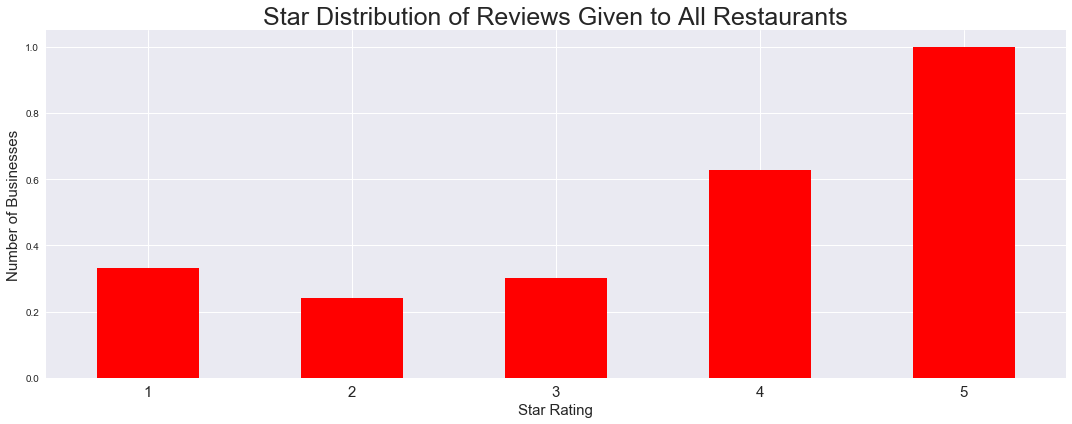

In [22]:
df = reviews_df.groupby('stars').count()['business_id'].copy()
df = df/df.max()

ax = df.plot(kind='bar', figsize=FIG_SIZE, color='r')
ax.set_title('Star Distribution of Reviews Given to All Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/restaurant_review_stars_distribution_clean.png')
plt.show()
plt.close()

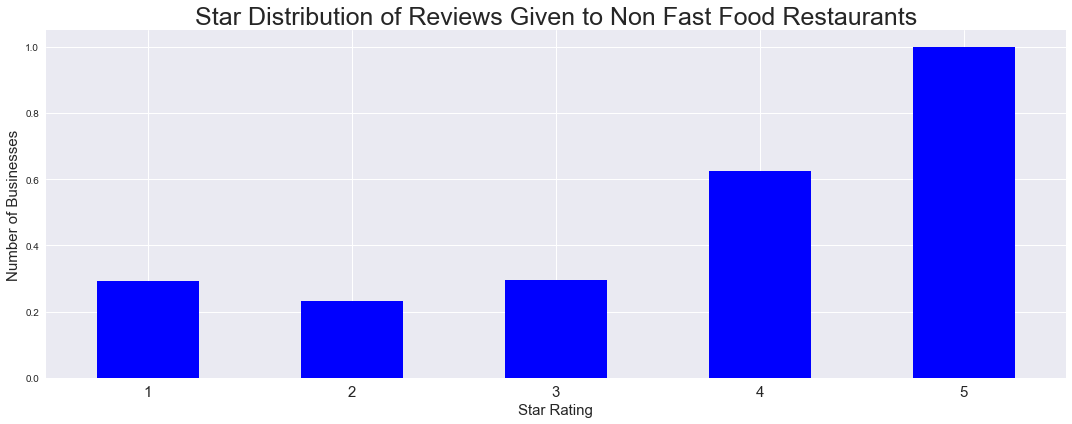

In [23]:
df = non_fast_food_reviews_df.groupby('stars').count()['business_id'].copy()
df = df/df.max()
ax = df.plot(kind='bar', figsize=FIG_SIZE, color='b')

ax.set_title('Star Distribution of Reviews Given to Non Fast Food Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/non_fast_food_restaurant_review_stars_distribution_clean.png')
plt.show()
plt.close()

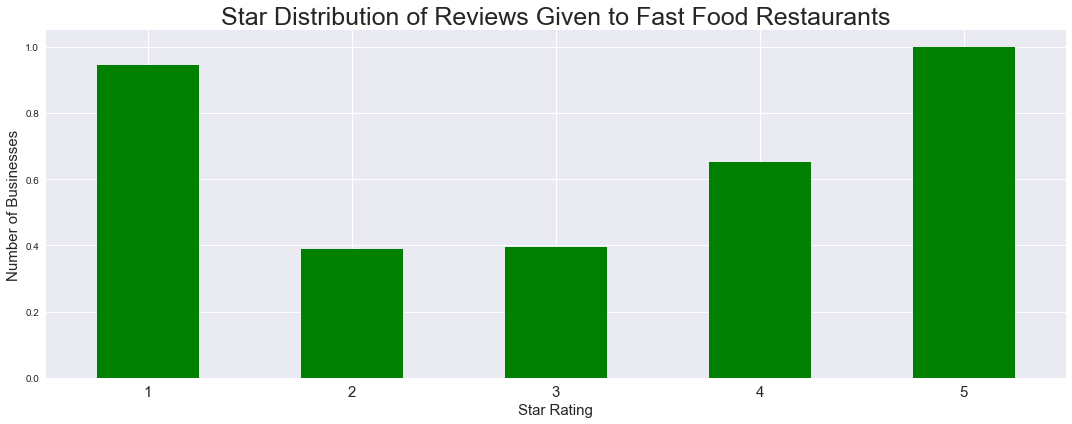

In [24]:
df = fast_food_reviews_df.groupby('stars').count()['business_id'].copy()
df = df/df.max()
ax = df.plot(kind='bar', figsize=FIG_SIZE, color='g')

ax.set_title('Star Distribution of Reviews Given to Fast Food Restaurants', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xticklabels(df.index.values, size=TICK_FONT_SIZE, rotation=0)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/fast_food_restaurant_review_stars_distribution_clean.png')
plt.show()
plt.close()